# 重新实现之前的线性热模型
应该只需要读取第一次实验的数据，这里主要想规范一下之前的写法

In [1]:
import pandas as pd
import numpy as np
import os
from keys import *
import math

from tqdm import tqdm
from loader import Loader
from thermal_model.data import *
from thermal_model.configs import *
from thermal_model.figure_plotter import *
from utils_thermal_model_raw_process import *
import matplotlib.pyplot as plt
from plotter import Plotter
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lars
from sklearn.ensemble import RandomForestRegressor
from thermal_model.thermal_model import fit_random_forest, model_estimator,fit_LARS
import pickle

# 读取数据并且缓存成单独pickle

In [2]:
df_thermal_model_data_raw = ThermalModelData().load()

   Reading data from cache: ../.cache\thermal_model_data_1101


# 生成线性模型的输入项

In [3]:
df_thermal_model_data_input = generate_model_input(df_thermal_model_data_raw)

In [4]:
df_thermal_model_data_input.columns

Index(['Unnamed: 0', 'date_time', 'stack_voltage', 'stack_current', '产氢量',
       '产氢累计量', 'lye_flow', 'temp_in', 'sys_pressure', 'temp_o', 'temp_h',
       '氧侧液位', '氢侧液位', 'OTH', 'HTO', '脱氧上温', '脱氧下温', 'B塔上温', 'B塔下温', 'C塔上温',
       'C塔下温', 'A塔上温', 'A塔下温', '露点', '微氧量', '出罐压力', '进罐温度', '进罐压力', 'temp_out',
       'delta_temp', 'cell_voltage', 'current_density',
       'voltage_thermal_neutral', 'ambt_temp', 'electric_heat',
       'radiation_dissipation', 'input_lye_heat', 'output_lye_heat'],
      dtype='object')

# 生成模型（应该使用线性模型）

In [5]:
model_random_forest,model_input,model_target = fit_random_forest(df_thermal_model_data_input,6)

---Model score of random forest with 6 estimator is: 0.8701695105718057


In [7]:
( model_predict, error) = model_estimator(
    model_random_forest,model_input,model_target
)

figure saved at Thermal model 使用随机森林进行回归分析的误差结果


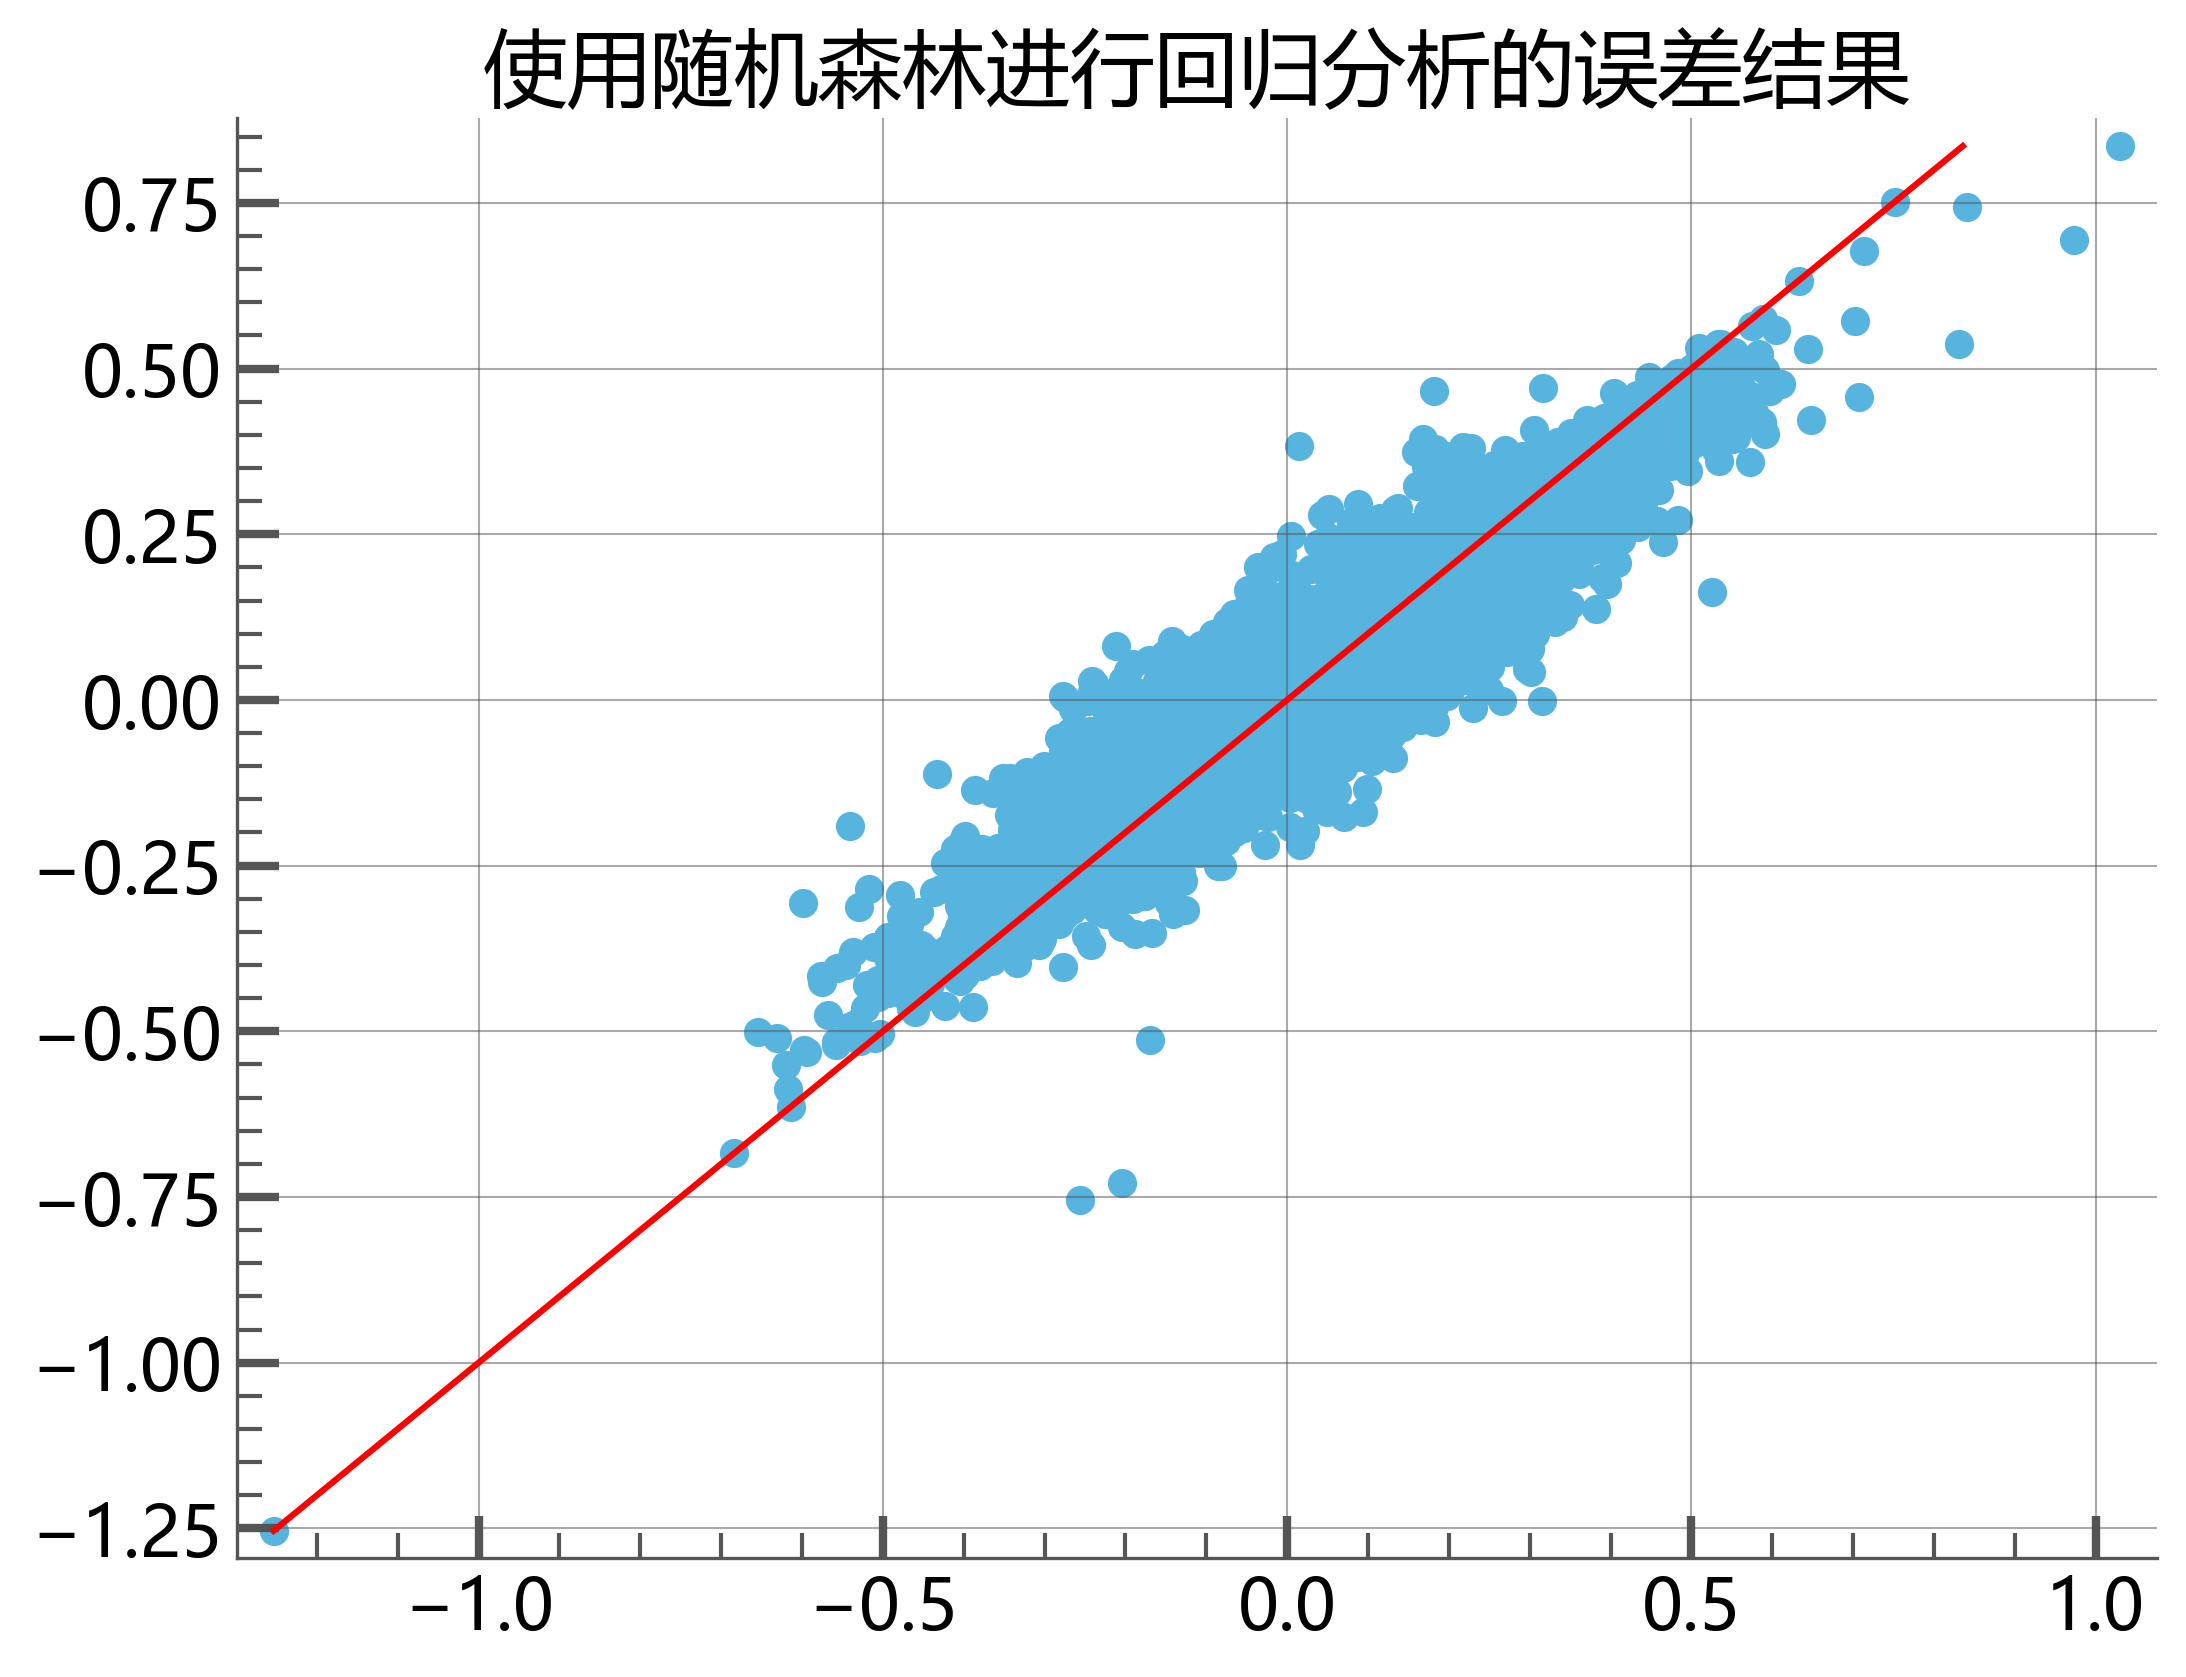

In [8]:
Thermal_model_regression_scatter(
    model_target = model_target,
    model_predict = model_predict,
    title_model="随机森林",
).save()

figure saved at Thermal model 使用随机森林进行回归分析的误差统计结果


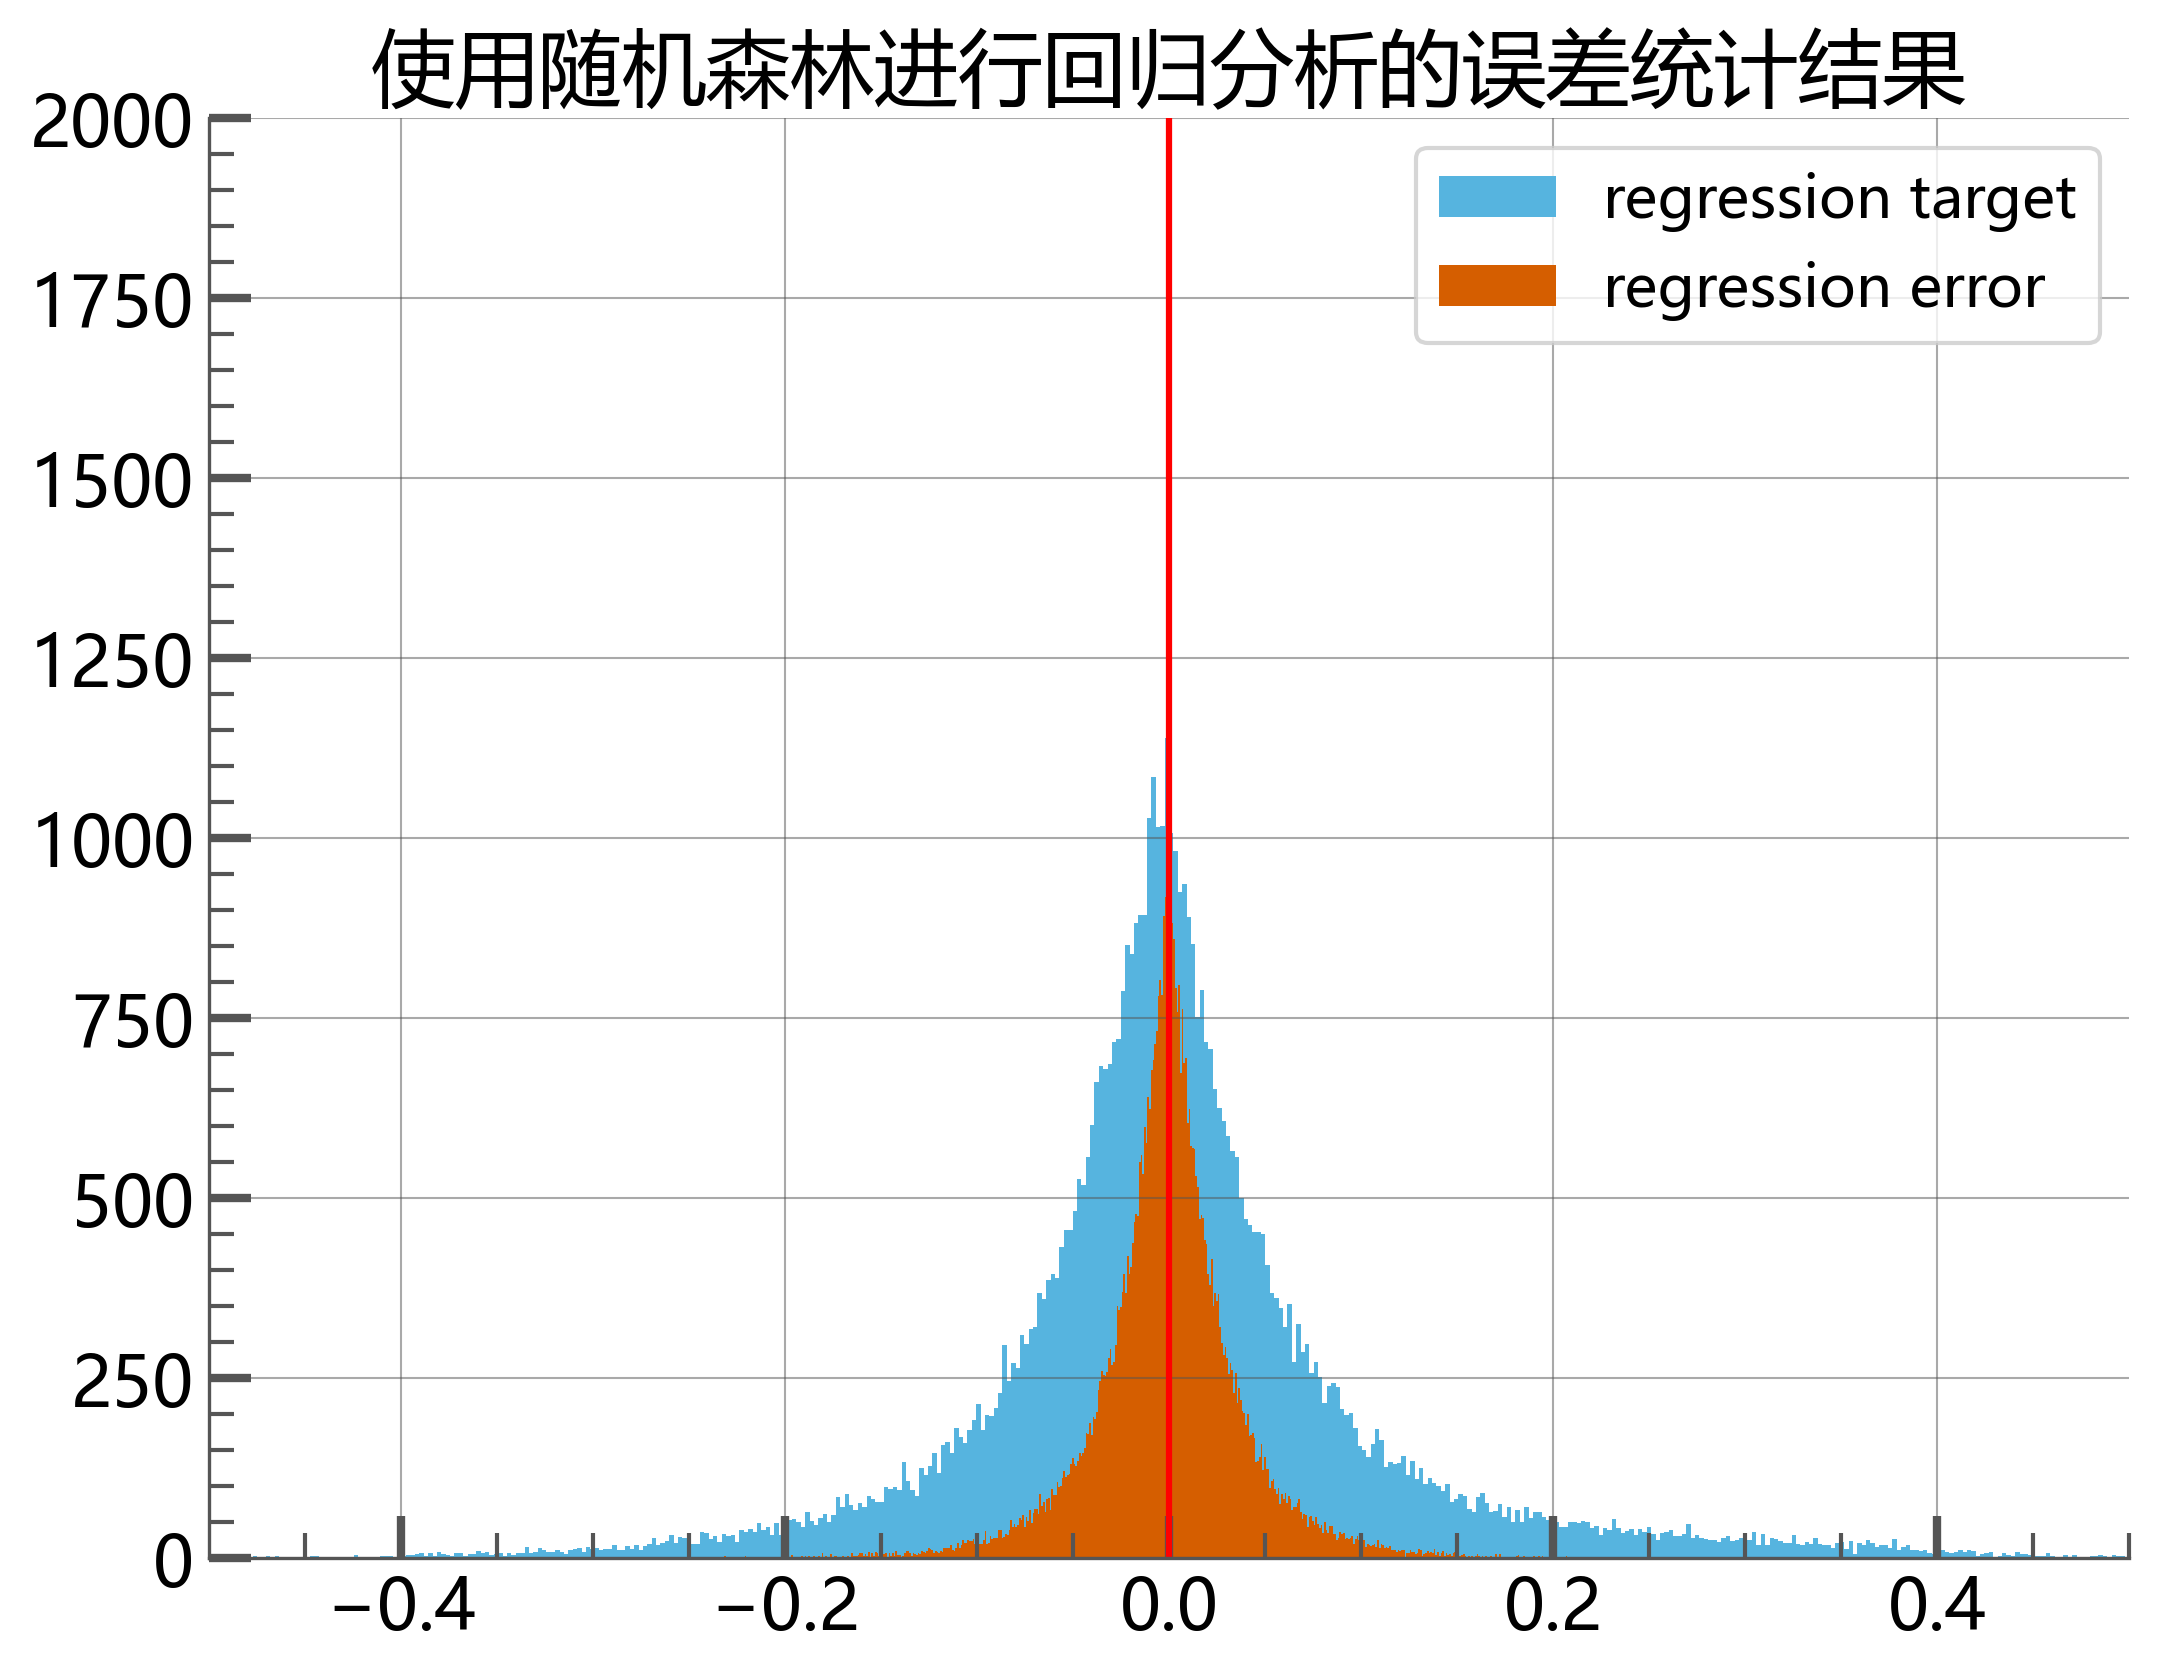

In [9]:
Thermal_model_regression_error_histplot(
    model_target=model_target,
    error=error,
    title_model="随机森林"
).save()

figure saved at Thermal model 使用随机森林进行回归的结果累计误差显示


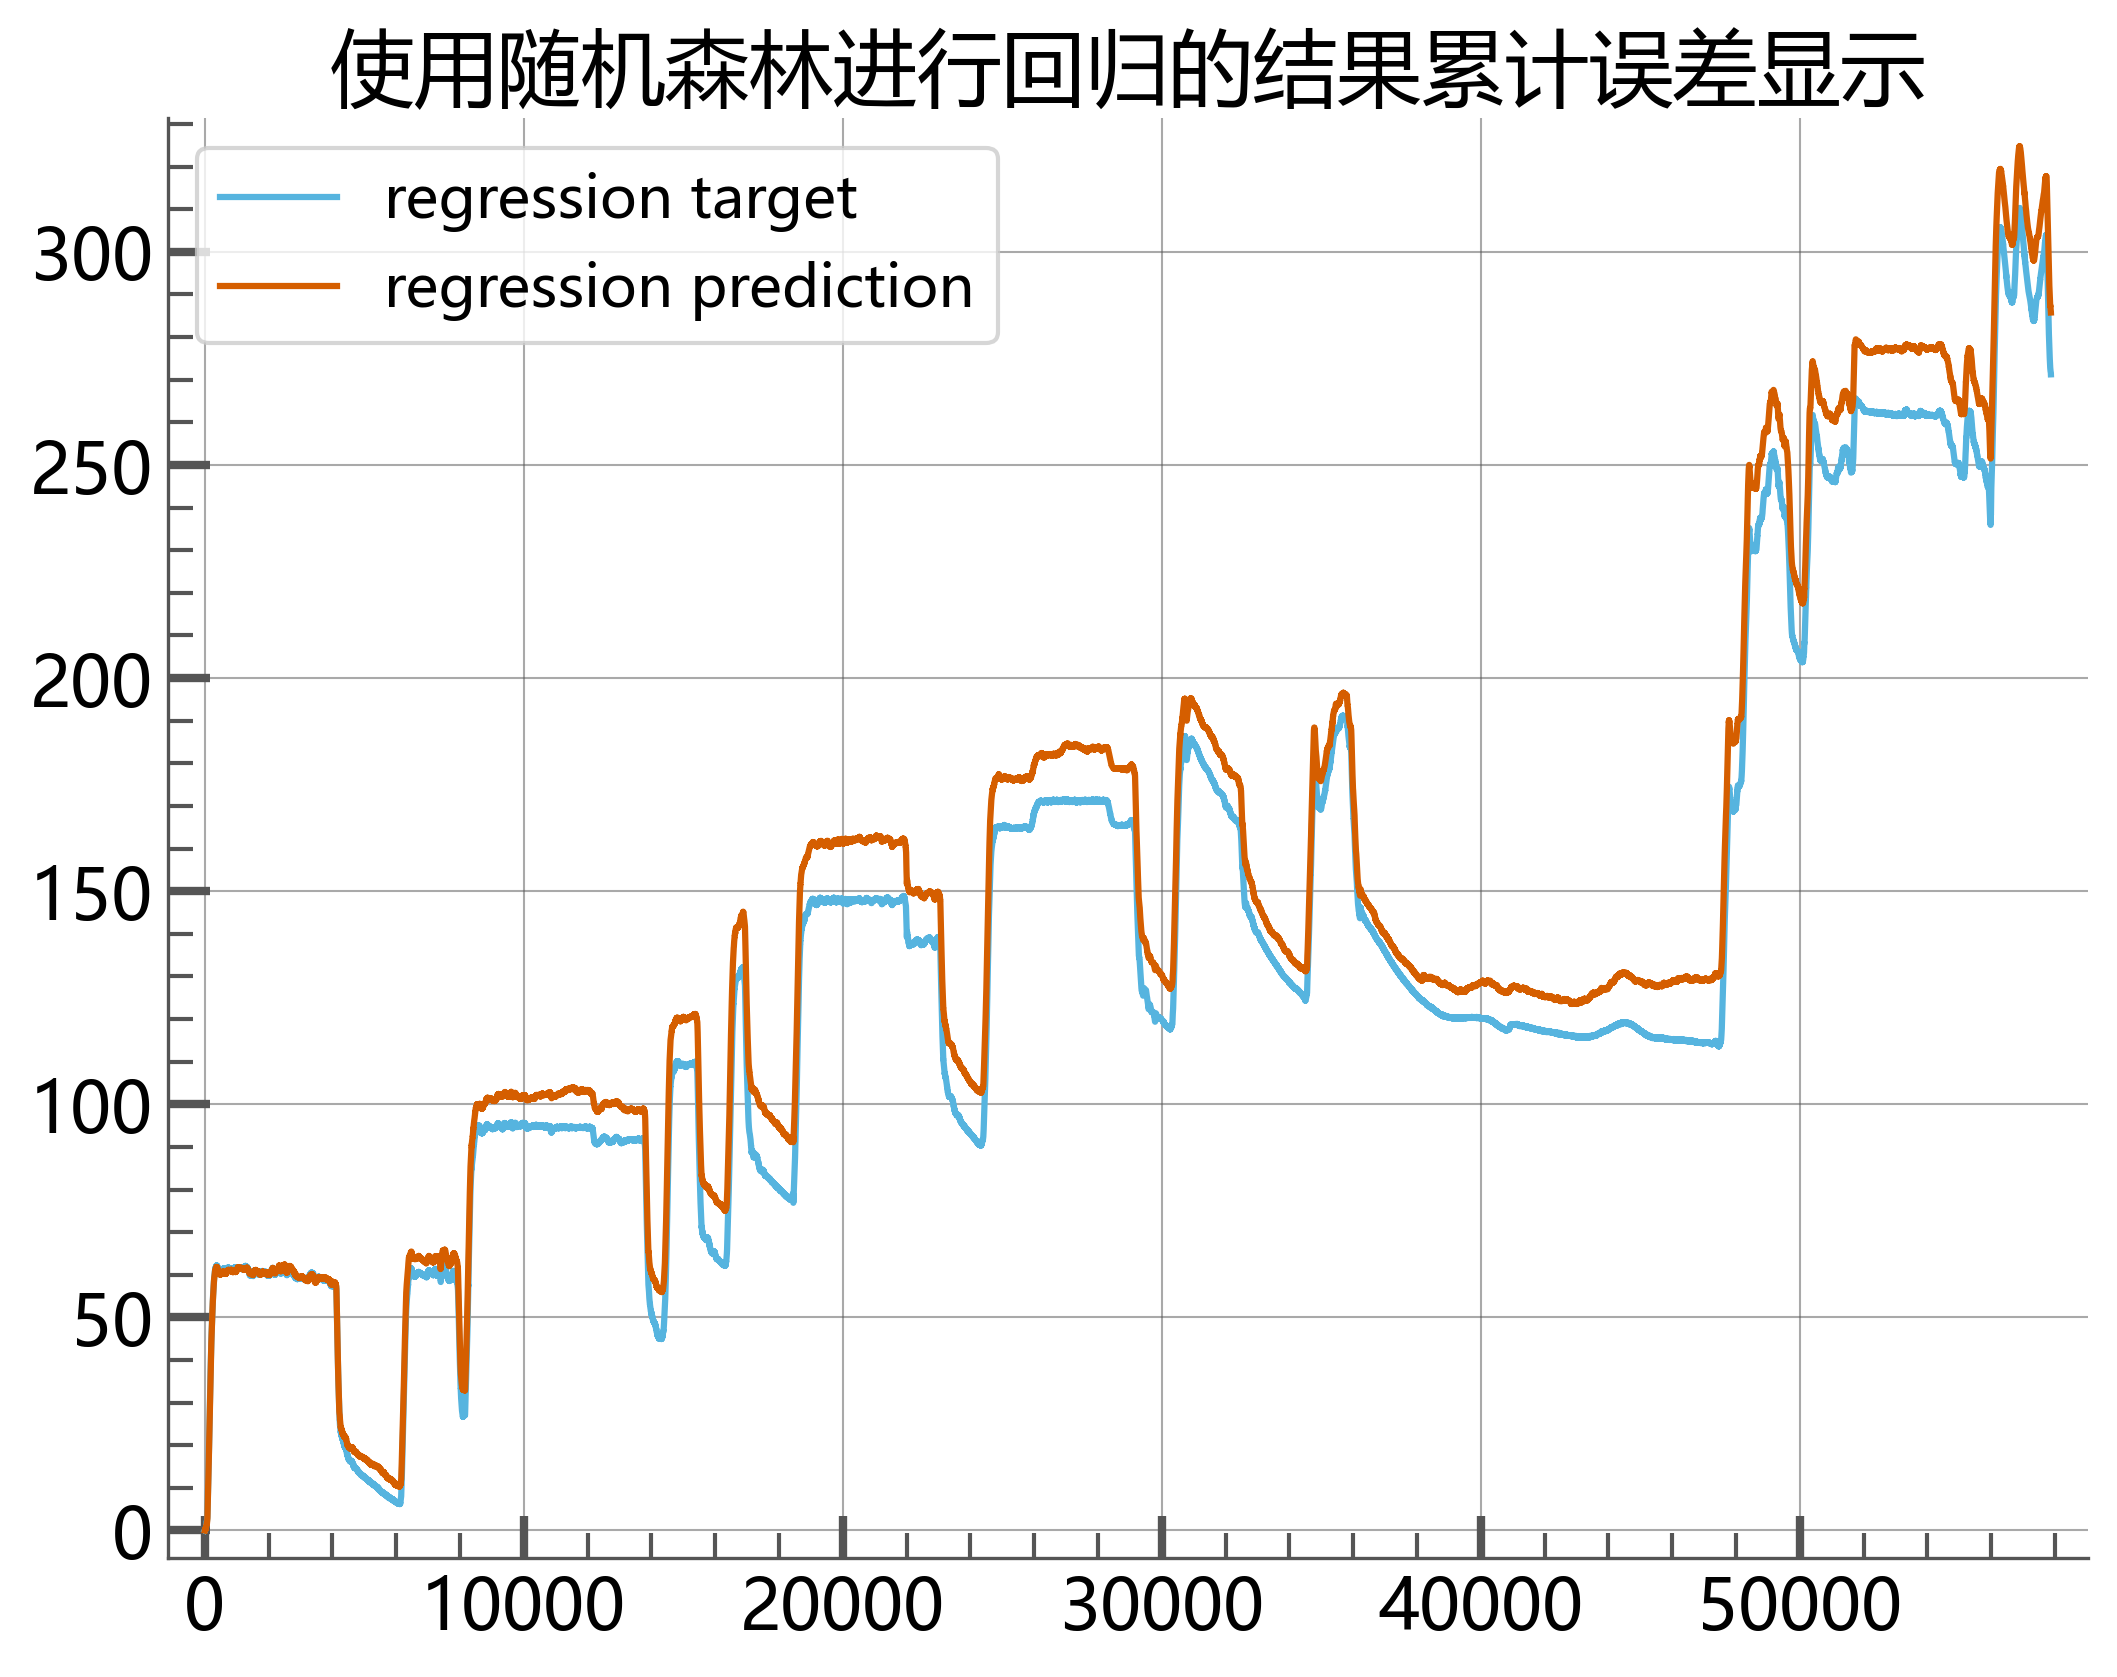

In [10]:
Thermal_model_regression_cumulative_error_plot(
    model_target=model_target,
    model_predict=model_predict
).save()

In [11]:
model_lars,model_input,model_target = fit_LARS(df_thermal_model_data_input)

---Model score of Lars is: 0.33499919171474335


In [12]:
( model_predict, error) = model_estimator(
    model_lars,model_input,model_target
)

figure saved at Thermal model 使用LARS进行回归分析的误差结果


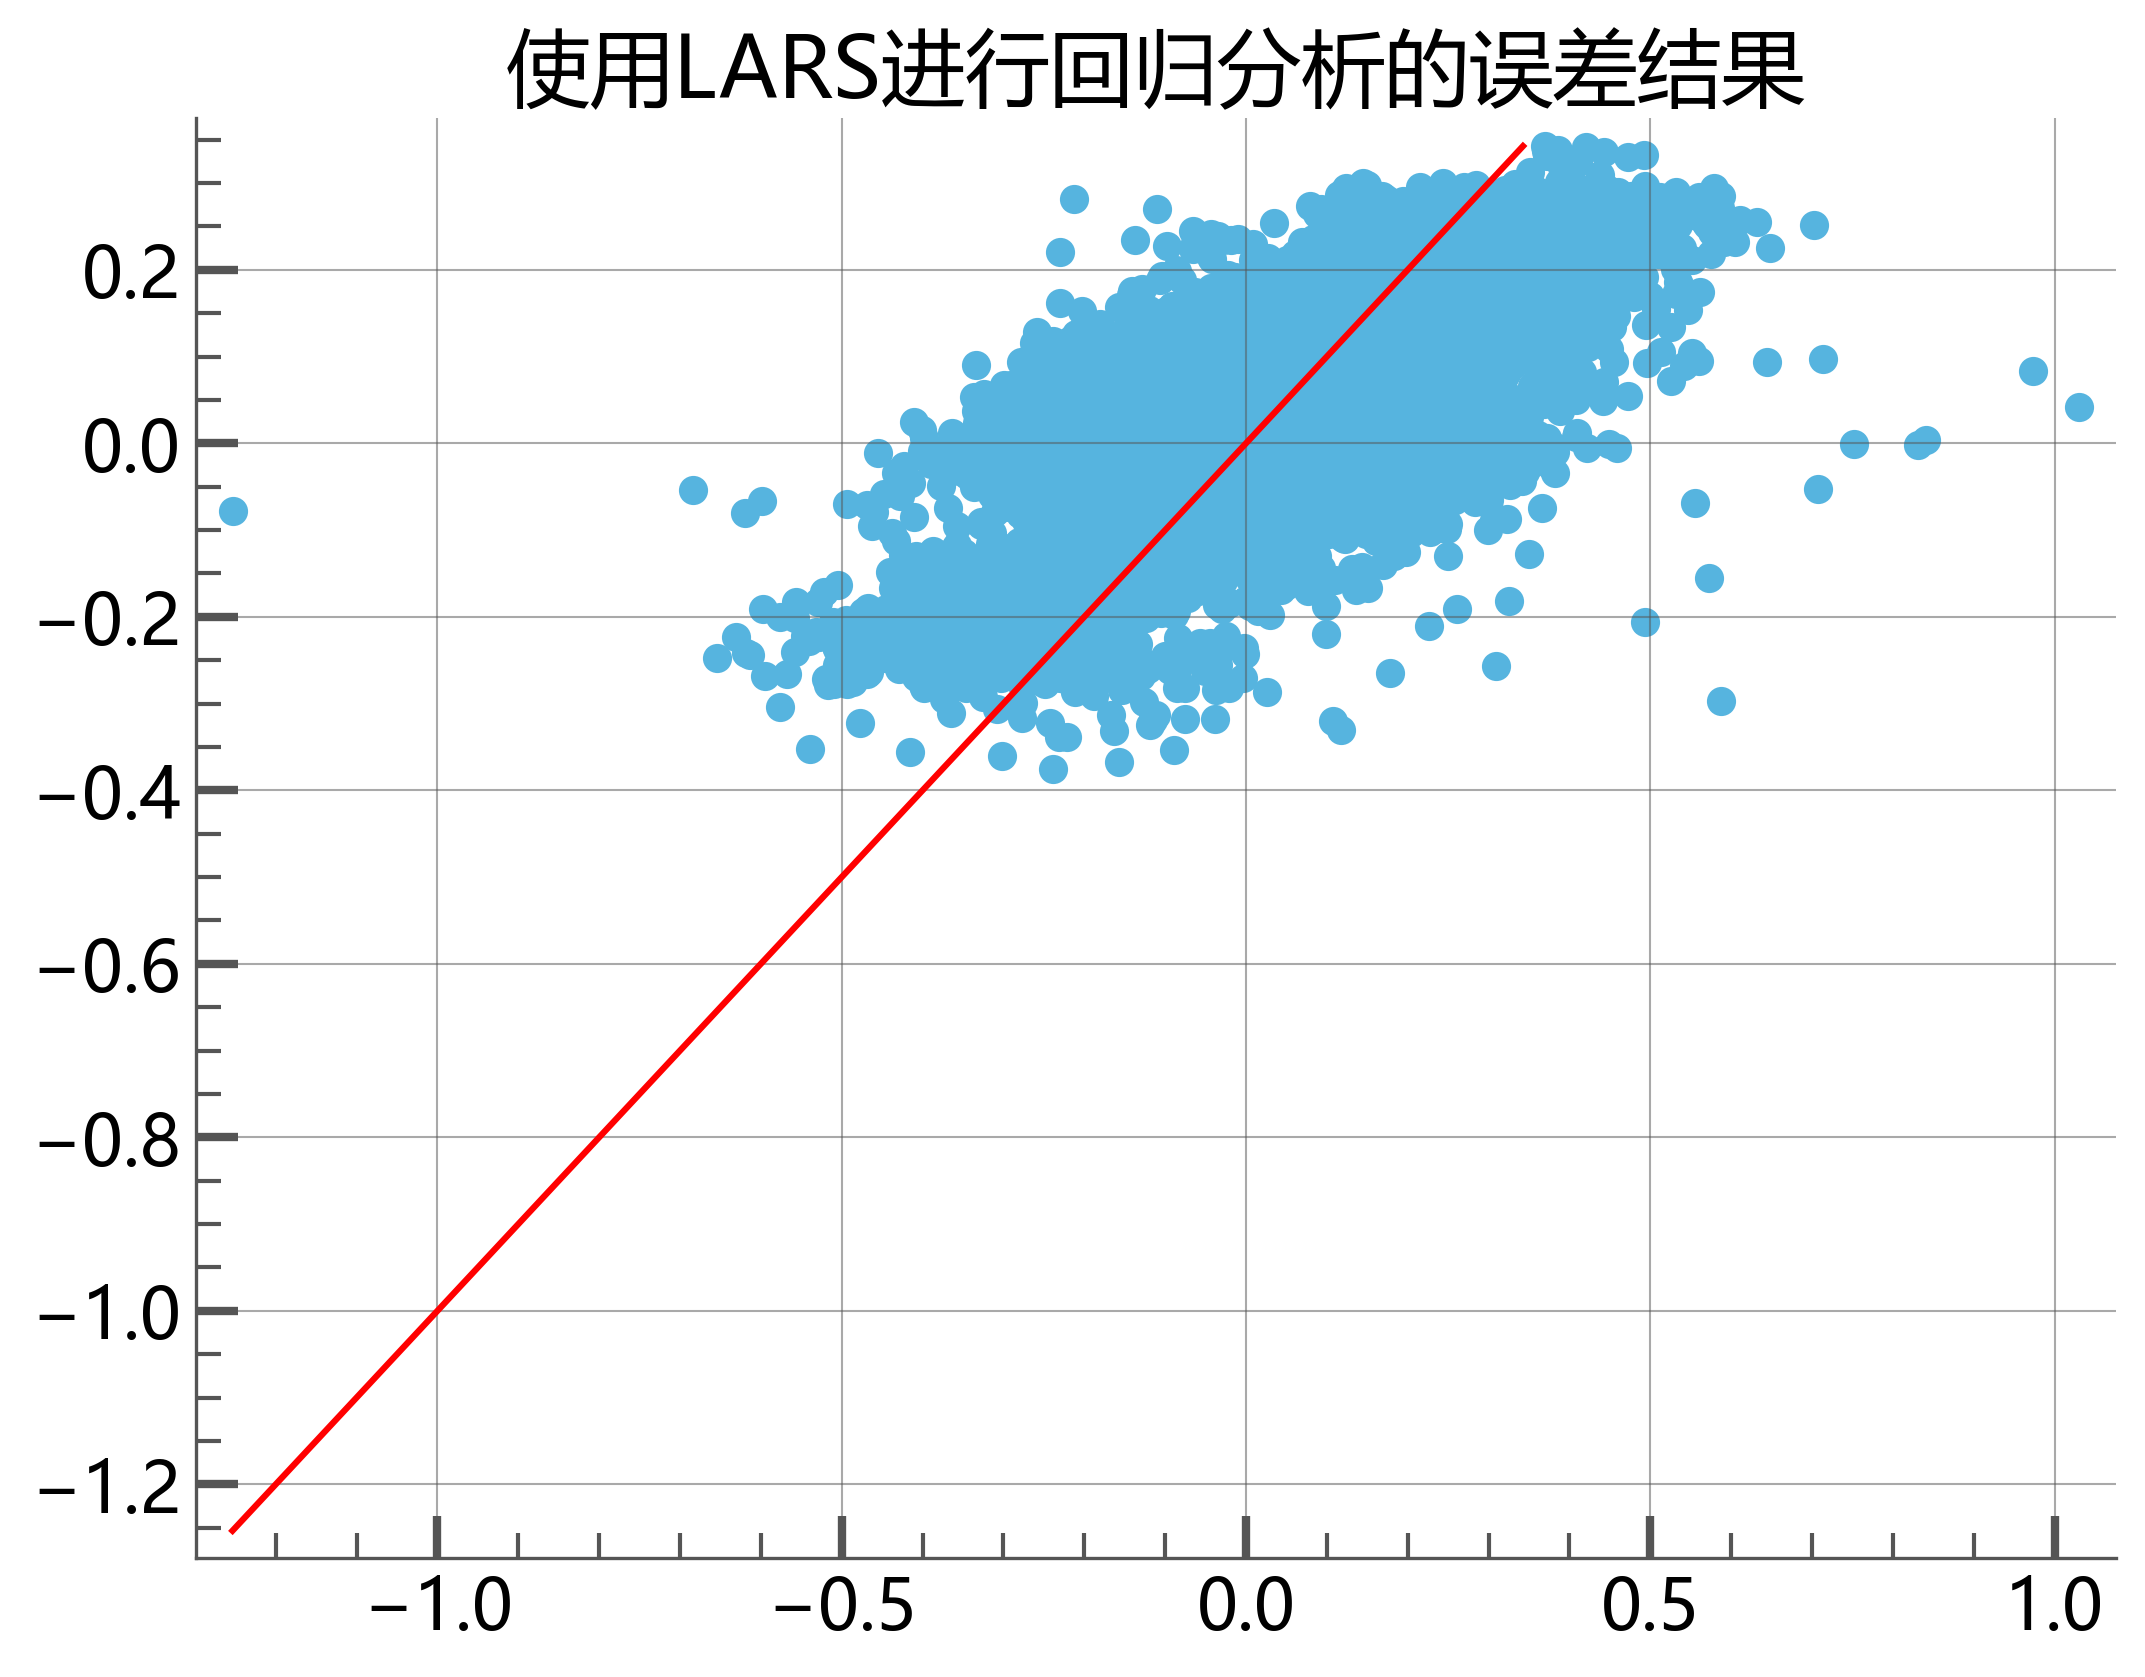

In [13]:
Thermal_model_regression_scatter(
    model_target = model_target,
    model_predict = model_predict,
    title_model="LARS",
).save()

figure saved at Thermal model 使用LARS进行回归分析的误差统计结果


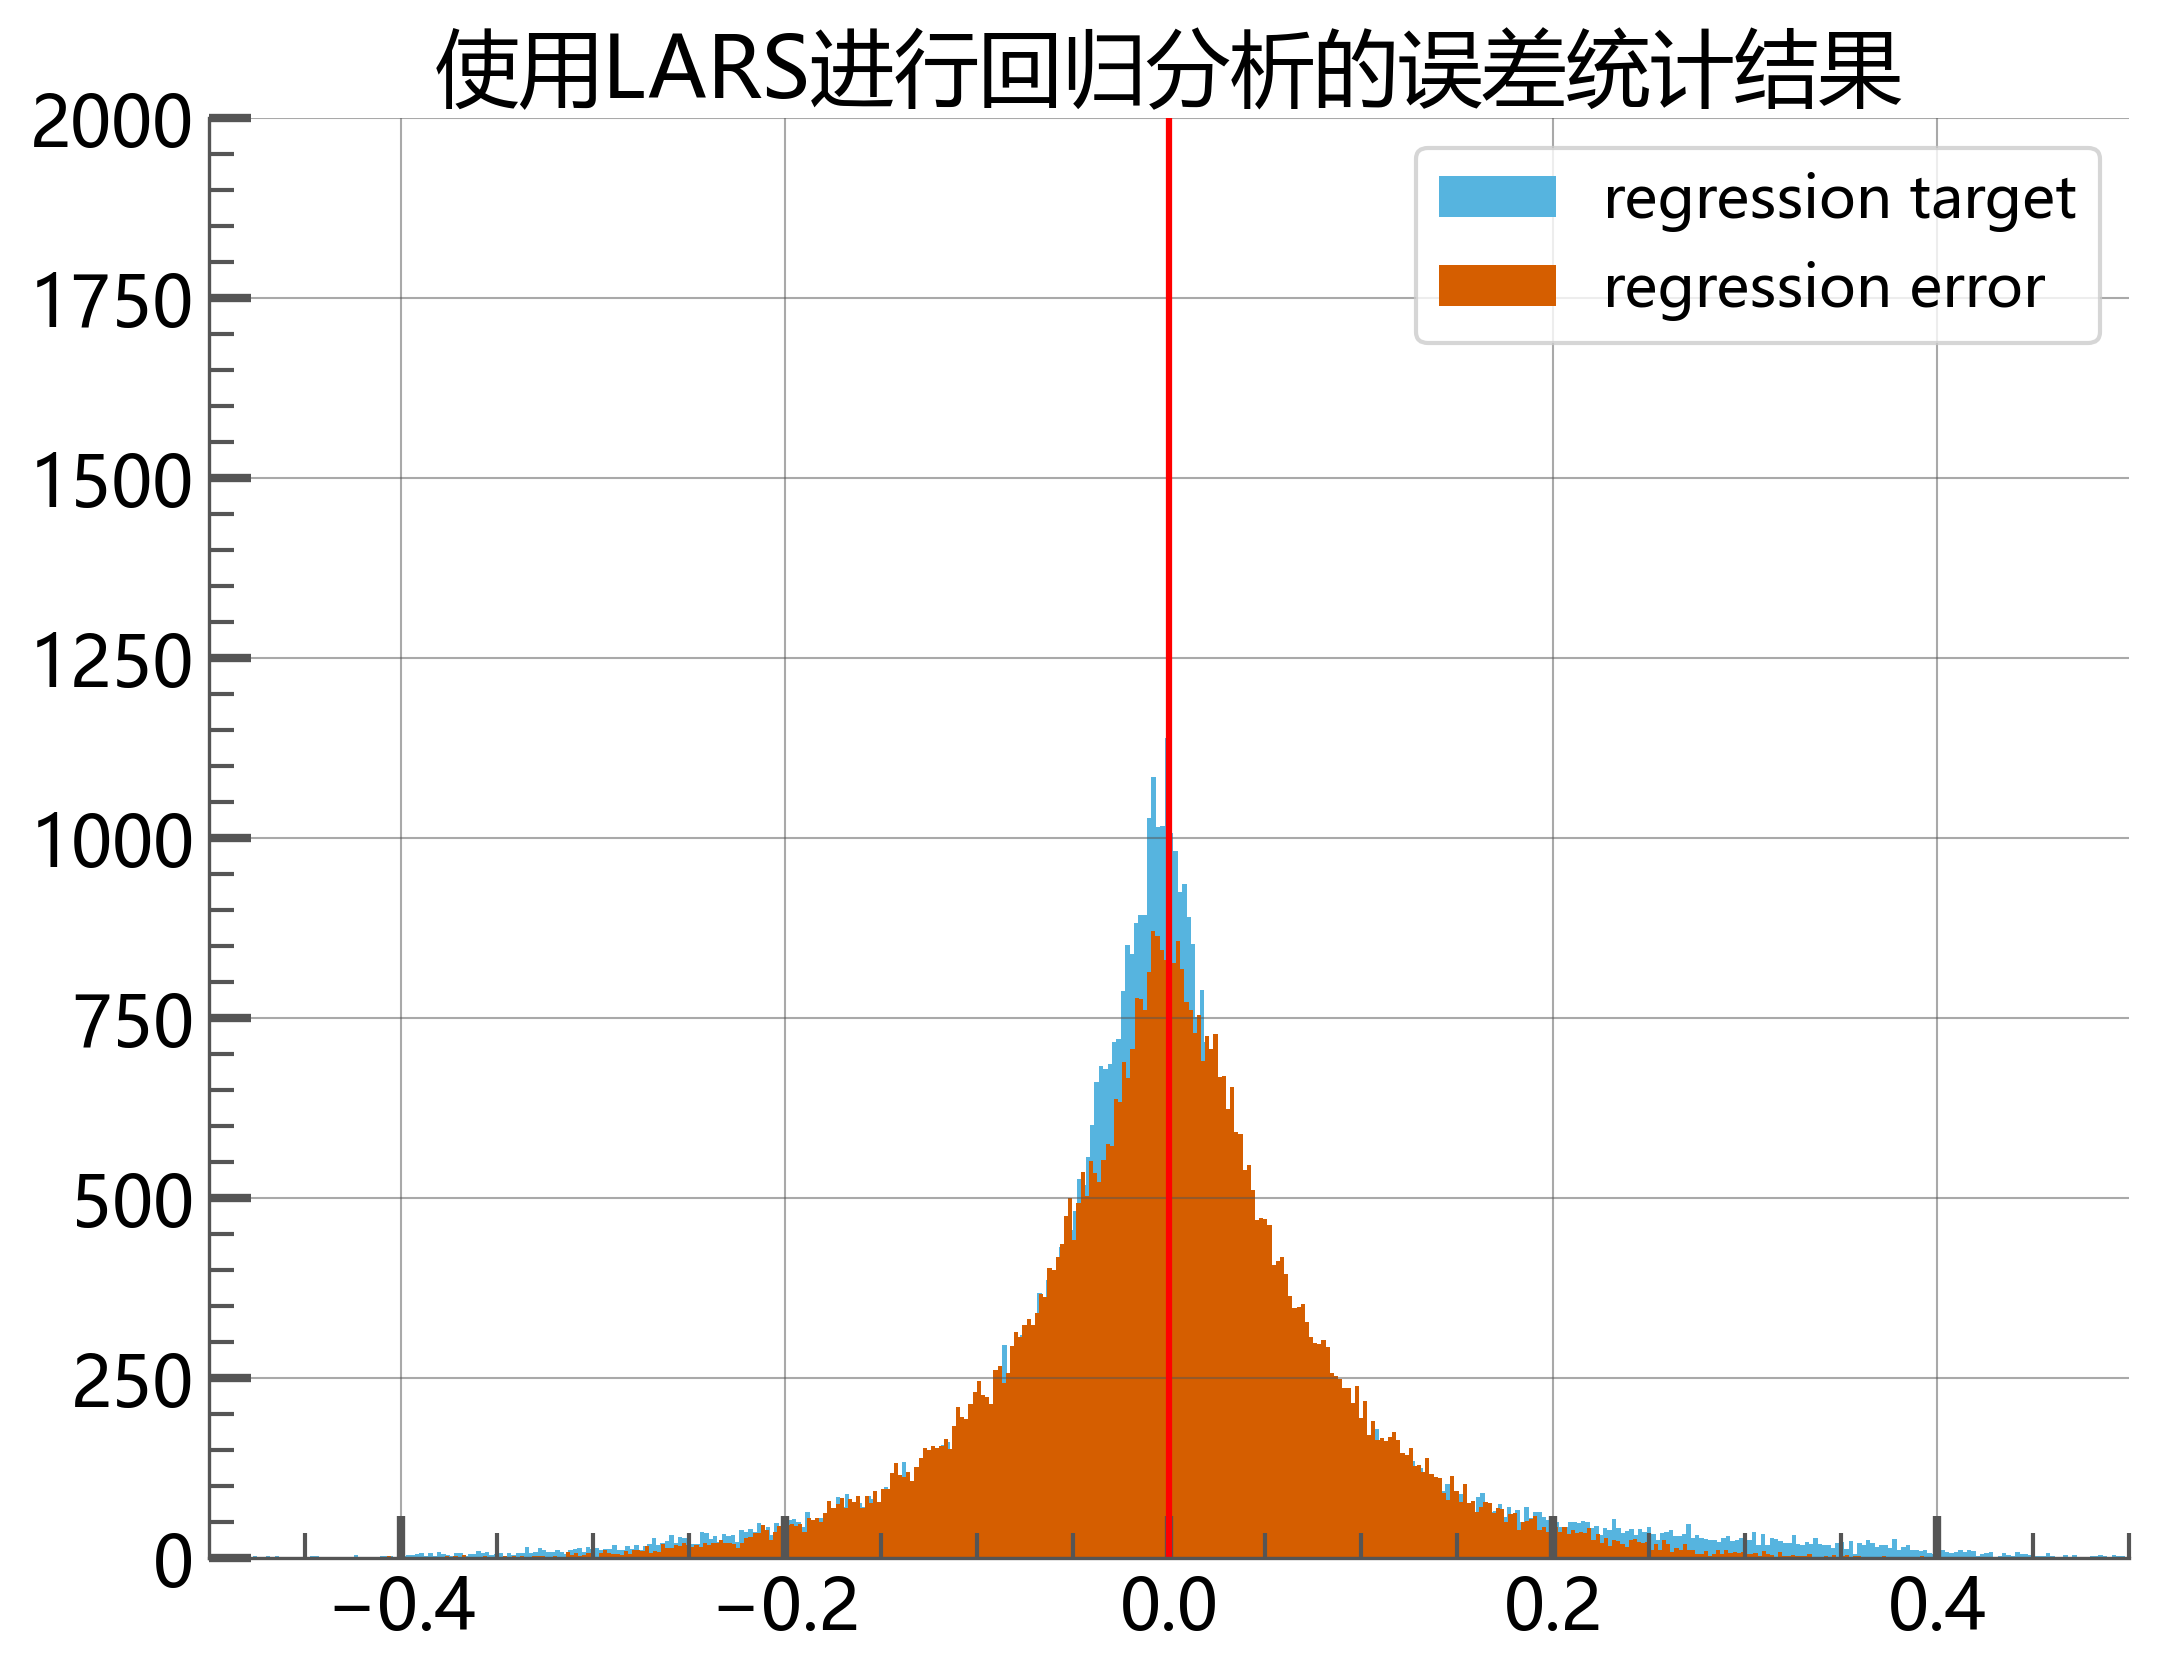

In [14]:
Thermal_model_regression_error_histplot(
    model_target=model_target,
    error=error,
    title_model="LARS"
).save()

figure saved at Thermal model 使用LARS进行回归的结果累计误差显示


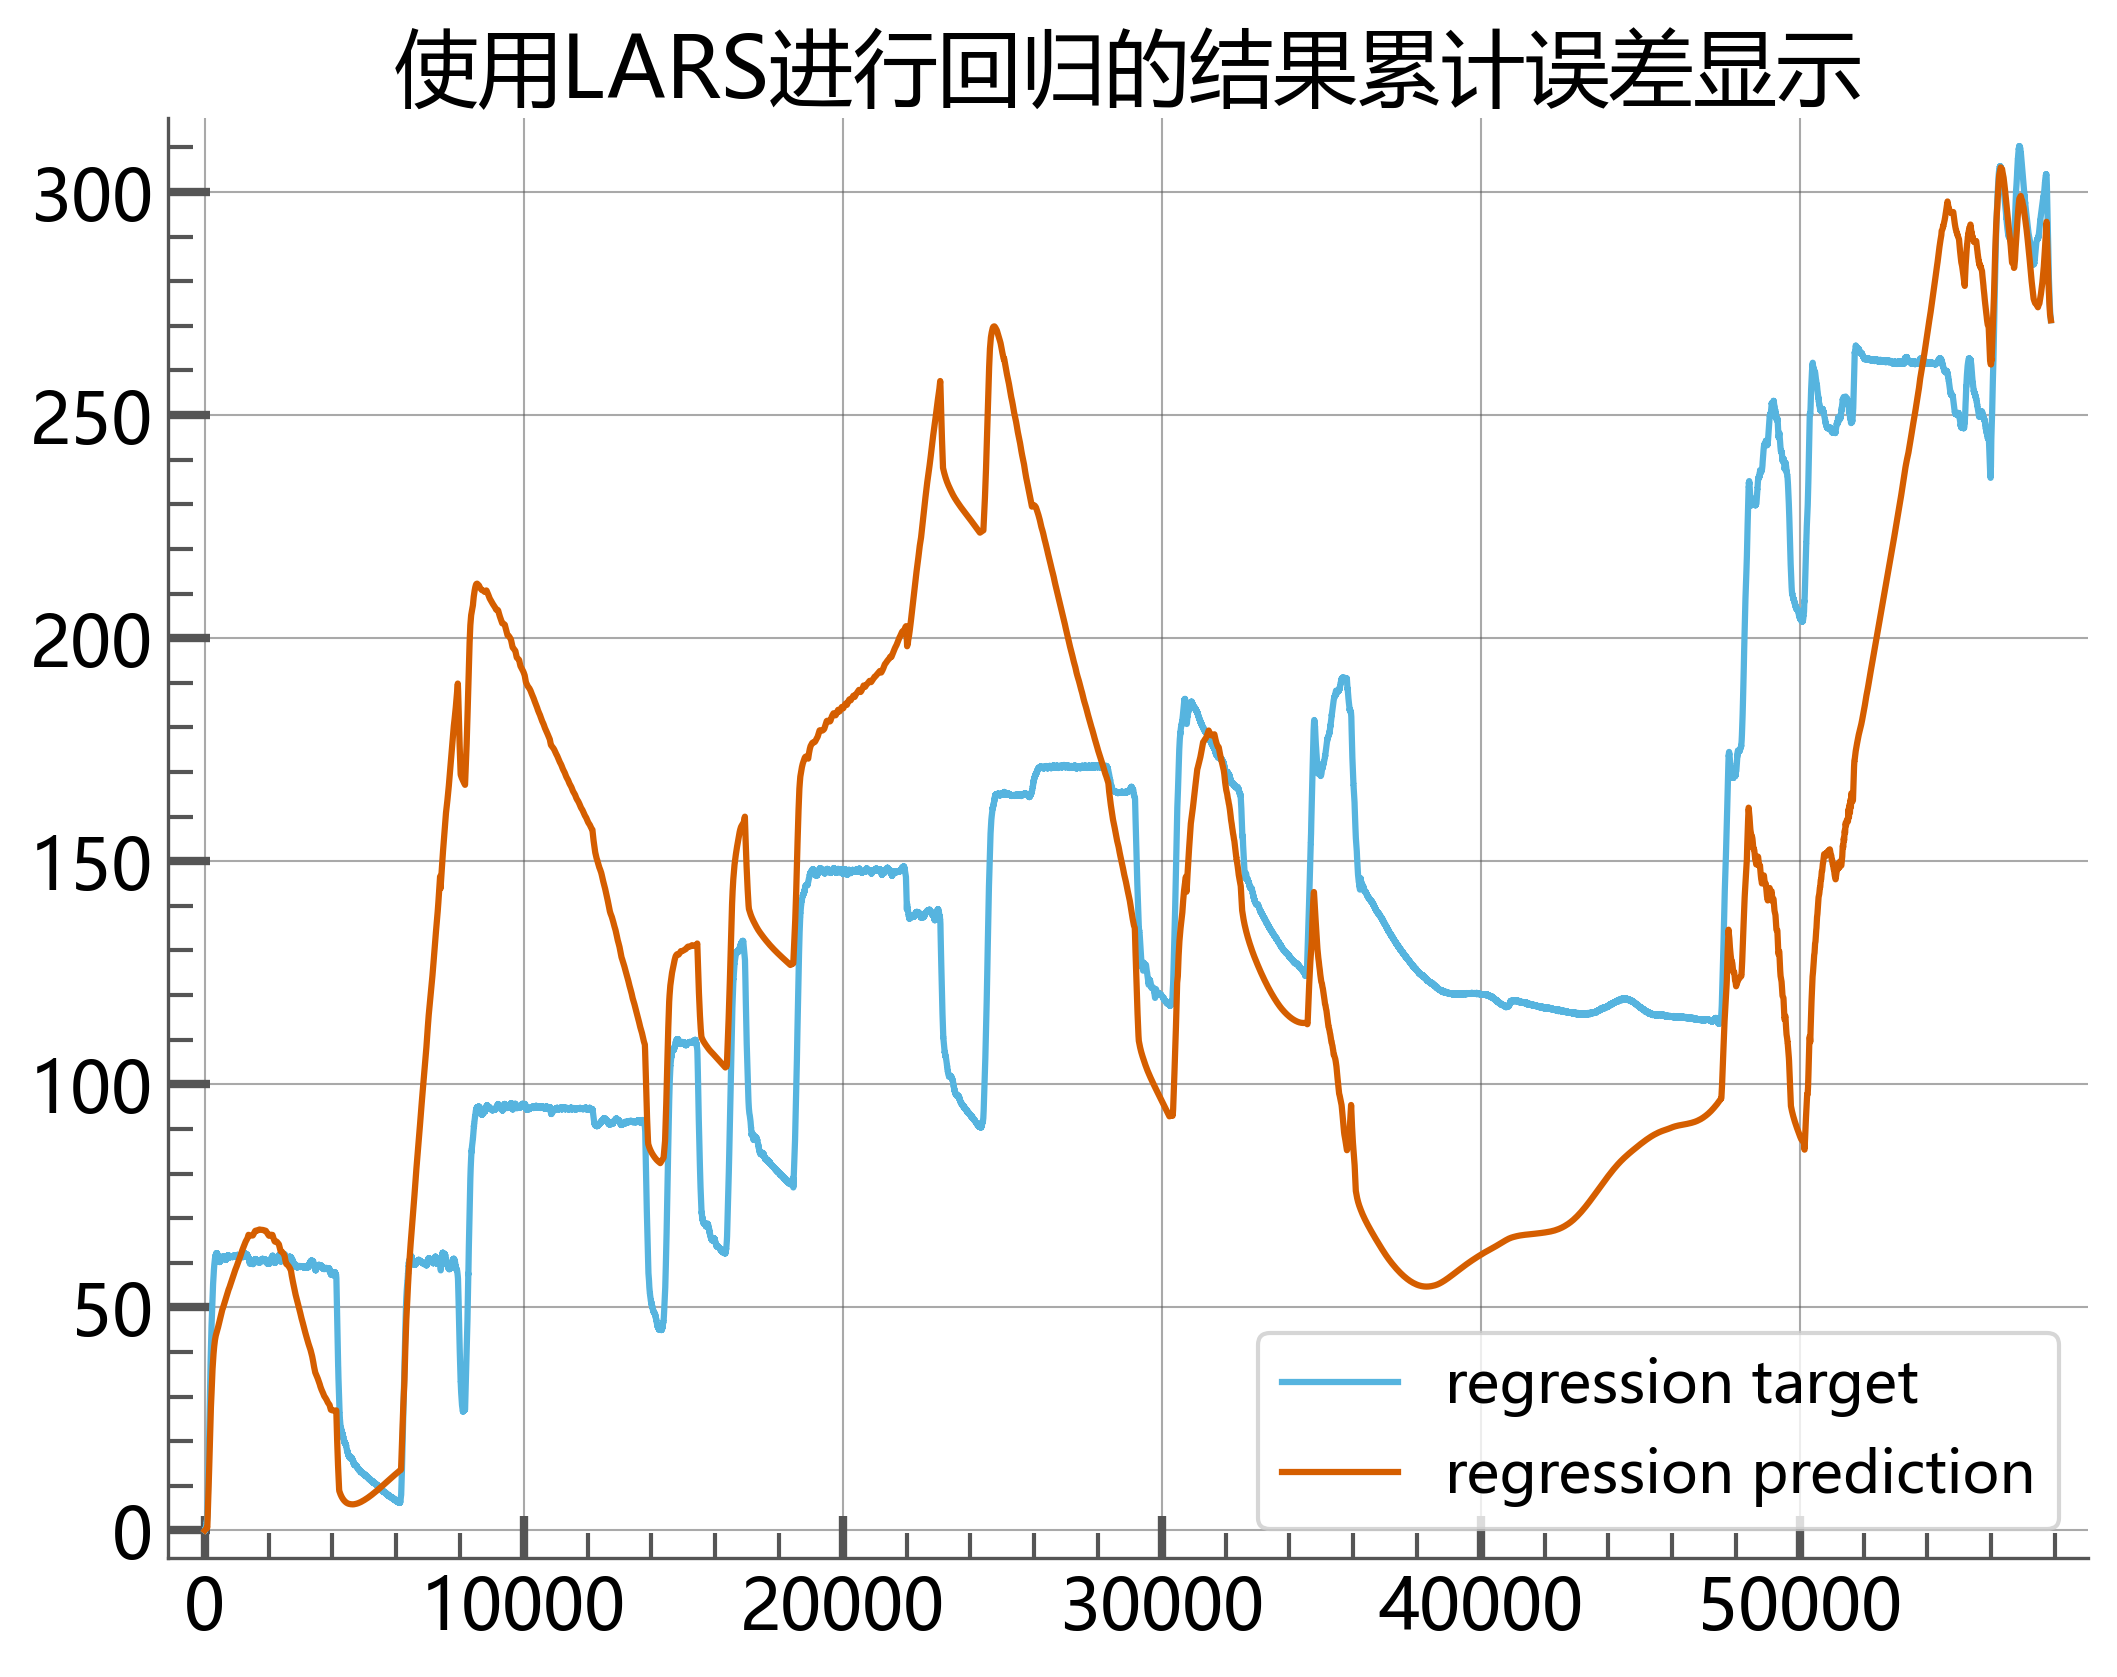

In [15]:
Thermal_model_regression_cumulative_error_plot(
    model_target=model_target,
    model_predict=model_predict,
    title_model='LARS'
).save()

# 测试模型功能

In [1]:
from thermal_model.configs import ElectrolyzerParameter

In [ ]:
1

In [2]:
ep = ElectrolyzerParameter()

In [3]:
ep.__dict__

{'radius_active': 367.8,
 'radius_margin': 53,
 'radius_endplate': 524,
 'thickness_plate': 10.4,
 'thickness_electrode': 1,
 'thickness_insulator': 3.75,
 'thickness_endplate': 97,
 'power_rated': 125,
 'current_density_max': 4000,
 'interval': 20,
 'theta_power': 0,
 'coefficient_lsq': [0.0009769136,
  -3.19807956e-13,
  0.000566544937,
  -0.000641418079],
 'coefficient_electric_heat': 1,
 'coefficient_radiation_dissipation': -3.2736565035024594e-10,
 'coefficient_input_lye_heat': 0.5799335140794437,
 'coefficient_output_lye_heat': -0.6565760564700911,
 'coefficient_delta_temp': 1023.6319772802835,
 'correction_electric_heat': 1.0,
 'correction_radiation_dissipation': -1.4214310326772457,
 'correction_input_lye_heat': 0.7209118268943362,
 'correction_output_lye_heat': -0.8161857055567431,
 'correction_delta_temp': 1.0362887600924242,
 'radius_plate': 420.8,
 'active_surface_area': 0.42498472674484183,
 'num_cells': 34,
 'length_total': 0.6855,
 'space_total': 0.3570893632074322,
 'sp

In [4]:
from thermal_model.original_thermal_model_and_plotter_0117 import Electrolyzer as ele_ori
from thermal_model.electrolyzer import Electrolyzer


In [5]:
electrolyzer = Electrolyzer()
ele_ori_model = ele_ori()
ele_ori_model.merge_coef()

In [6]:
ele_ori_model.__dict__

{'surf_area_active': 0.4254470362624,
 'n_cell': 34,
 'total_length': 0.6855,
 'total_space': 0.35734932057370616,
 'vacancy_space': 0.13597287278946305,
 'occupied_space': 0.15038202349712662,
 'rate_vacancy': 0.3805040753153399,
 'surface_area': 4.2756352719702,
 'interval': 20,
 'max_current_density': 4000,
 'epsilon': 0.95,
 'weight_structural': 1188.0179856273003,
 'weight_alkaline_inside': 174.0452771705127,
 'weight_total': 1362.063262797813,
 'HC_structural': 594.0089928136501,
 'HC_alkaline_inside': 393.777439598285,
 'HC_total': 987.7864324119352,
 'HC_alkaline_in_flux': 0.8044444444444444,
 'Model_Target': [1,
  -3.2736565035024594e-10,
  0.5799335140794437,
  -0.6565760564700911,
  1023.6319772802835],
 'corr_power': 1.0,
 'corr_radiation': -1.4214310326772457,
 'corr_HeatLyeIn': 0.7209118268943362,
 'corr_HeatLyeOut': -0.8161857055567431,
 'corr_DeltaTemp': 1.0362887600924242,
 'coef_power': 1.0,
 'coef_radiation': -3.27365650350246e-10,
 'coef_HeatLyeIn': 0.57993351407944

In [ ]:
electrolyzer.pring_all_properties()

In [ ]:
ele_ori_model.Print_All_Properties()

In [ ]:
(
            current_list,
            voltage_list,
            power_list,
            temperature_list
        ) = electrolyzer.get_default_polarization()

In [ ]:
electrolyzer.temperature_thermal_balance_current(
    ambient_temperature=15,
    lye_flow=1.5,
    lye_temperature=10,
    current=0
)